## AUTOENCODERS 

This special application of neural network has the ability to compress the input information to then decompress it to reconstruct the original data.

During the compression stage (ENCODER) the neural network is extracting all the relevant features of the data, leaving noise and anomalies out of the analysis.
Then a similar shape and topology neural network is connected to the output of the ENCODER (called BOTTLENECK) to decompress the information and therefore reconstruct the data but in this case without the input noise and anomalies.

An Autoencoder NN is composed by the following layers:
- ENCODER: Basically a typical NN, with N input and n output features (where N > n) and with K hidden layers ( k > 1).
- BOTTLENECK: The output of the ENCODER, with shape n. 
- DECODER: Another typical NN with the same shape as the ENCODER but reversed, it means that is going to have n input and N output features with K hidden layers.

The Neural network is trained using backpropagation to refresh the weights and biases. The loss functions is generally based on the squared error of the output vs the input, in other words the ability of the autoencoder to reconstruct the original data.

Deep encoders are autoencoders where K > 1 (Hidden layers). Increasing the number of compresion stages some advantages appear:
- Depth can exponentially reduce the computational cost of representing some functions
- Depth can exponentially decrease the amount of training data needed to learn some functions
- Experimentally, deep autoencoders yield better compression compared to shallow or linear ones.




### Anomaly detection over credit card transactions

Using a huge dataset of transactions with 30 features (where 28 are normalized and processed by an PCA analysis).
Model is going to be trained using only data of 'Normal' transactions.

Library Import

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import os
from tensorflow.python.framework import ops

import matplotlib.gridspec as gridspec
import seaborn as sns
from sklearn.metrics import confusion_matrix, precision_recall_curve

session = tf.Session()
%config Completer.use_jedi = False

ops.reset_default_graph()
session = tf.Session()

Dataset import

A credit card transactions record, with 284315 normal values and 492 fraud transactions.

In [2]:
data = pd.read_csv('../../Datasets/creditcard.csv')

### Explotatory data Analysis EDA

Lets take a look to the data we have

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


There are 27 features defined by a PCA method (V1 to V28). Amount is the money involved in the transaction. And time is the amount of time since the first transaction.

Label is defined by 'Class'. 0 for a normal transaction and 1 to a fraudulent one.

In [4]:
classes = data['Class'].value_counts(sort = True)

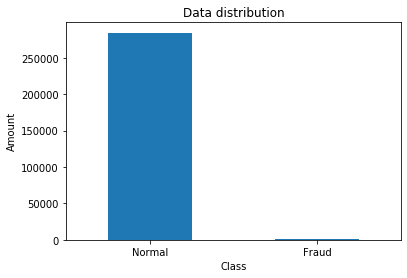

In [5]:
classes.plot(kind = 'bar', rot = 0)
plt.xticks(range(2), ['Normal', 'Fraud'])
plt.title('Data distribution')
plt.xlabel('Class')
plt.ylabel('Amount')
plt.show()

Most of the data yield to Normal transactions.

Let's see now the data over time:

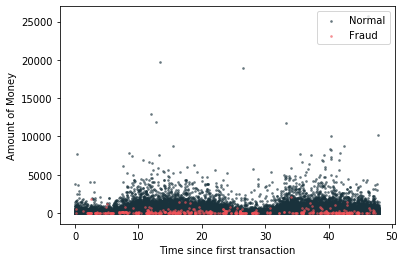

In [6]:
normal = data[data.Class == 0]
fraud = data[data.Class == 1]

plt.scatter(normal.Time/3600, normal.Amount, alpha = 0.5, c = '#19323C', label = 'Normal', s = 3)
plt.scatter(fraud.Time/3600, fraud.Amount, alpha = 0.5, c = '#F2545B', label = 'Fraud', s = 3)
plt.xlabel('Time since first transaction')
plt.ylabel('Amount of Money')
plt.legend(loc = 'upper right')
plt.show()

Zoom into transactions under $2000

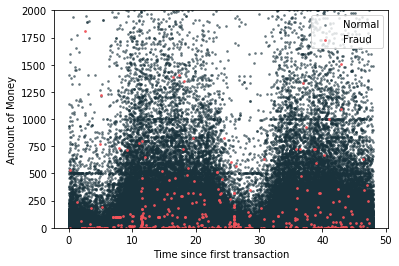

In [7]:
plt.scatter(normal.Time/3600, normal.Amount, alpha = 0.5, c = '#19323C', label = 'Normal', s = 3)
plt.scatter(fraud.Time/3600, fraud.Amount, alpha = 0.9, c = '#F2545B', label = 'Fraud', s = 3)
plt.ylim([0,2000])
plt.xlabel('Time since first transaction')
plt.ylabel('Amount of Money')
plt.legend(loc = 'upper right')
plt.show()

A great amount of fraudulent transactions are below $250.

Let's plot a histogram to see how the transactions are distributed in the data.

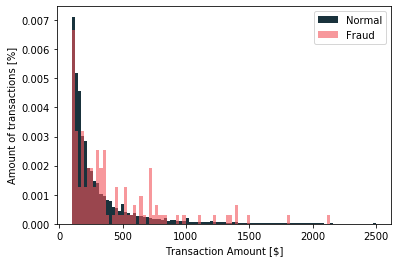

In [8]:
bins = np.linspace(100, 2500, 100)
plt.hist(normal.Amount, bins, alpha = 1, density = True, label = 'Normal', color = '#19323C')
plt.hist(fraud.Amount, bins, alpha = 0.6, density = True, label = 'Fraud', color = '#F2545B')
plt.legend(loc = 'upper right')
plt.xlabel('Transaction Amount [$]')
plt.ylabel('Amount of transactions [%]')
plt.show()

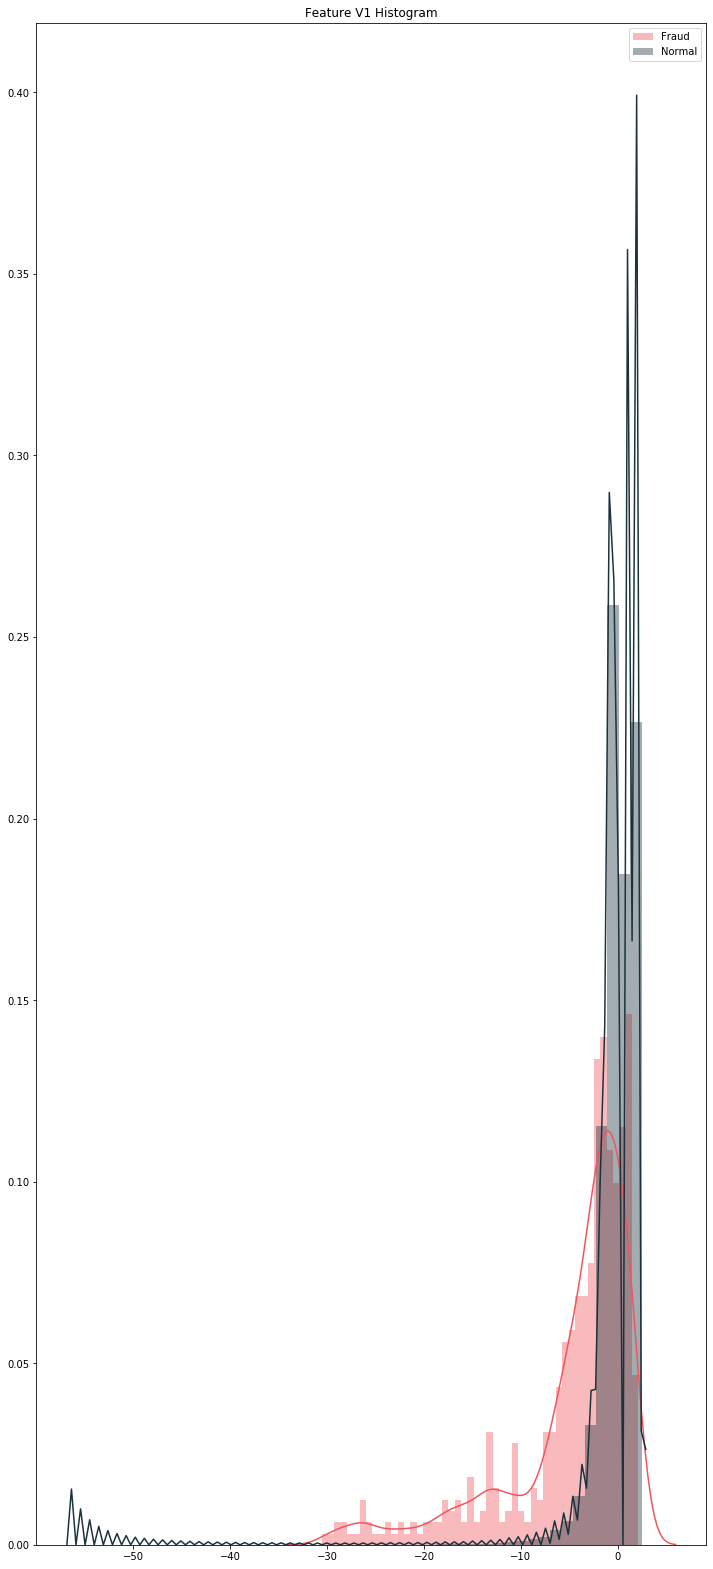

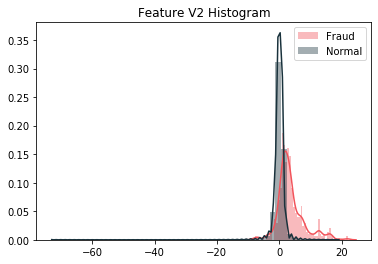

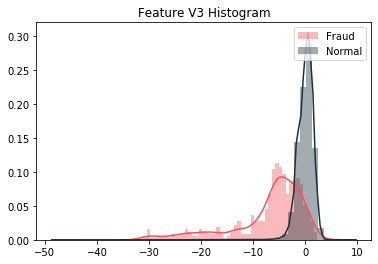

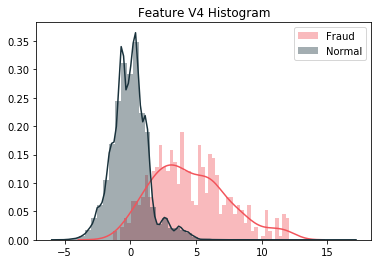

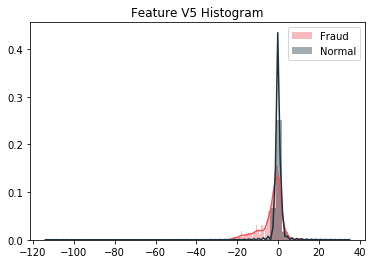

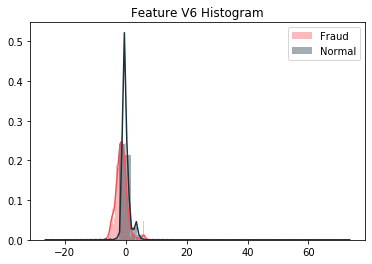

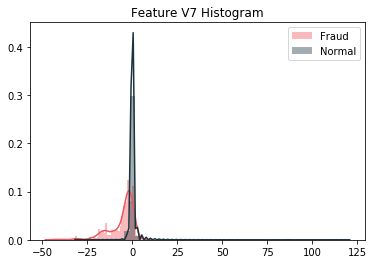

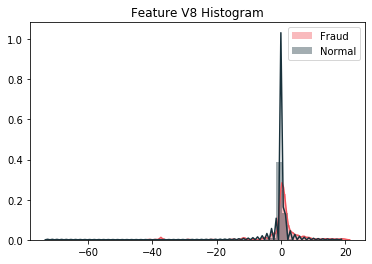

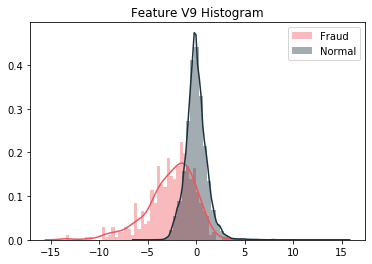

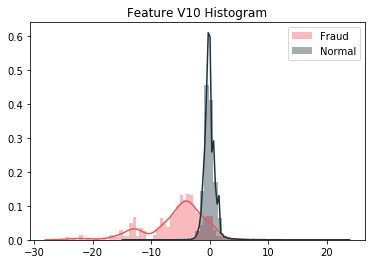

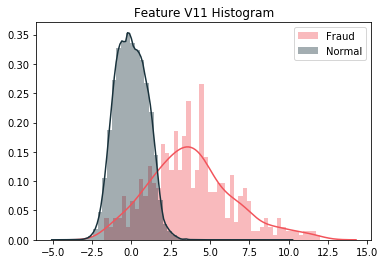

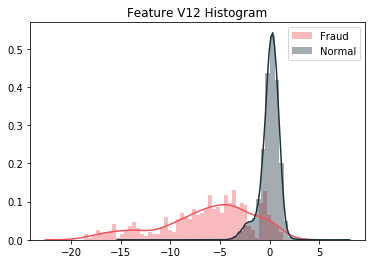

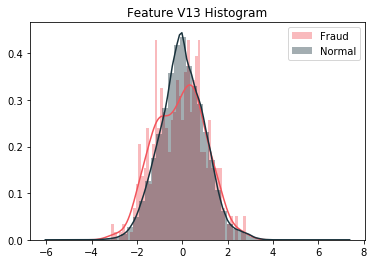

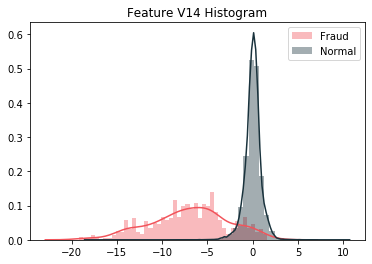

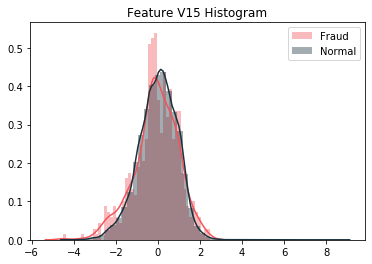

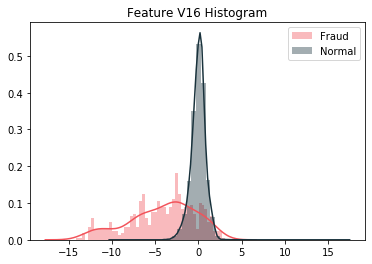

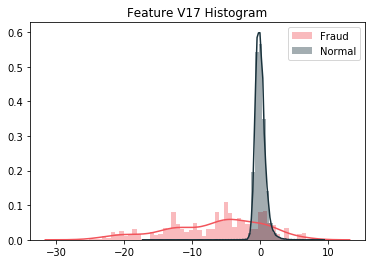

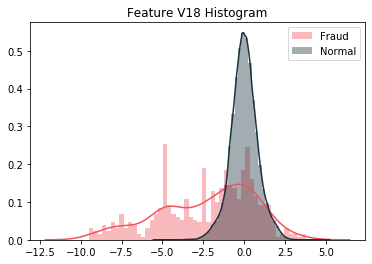

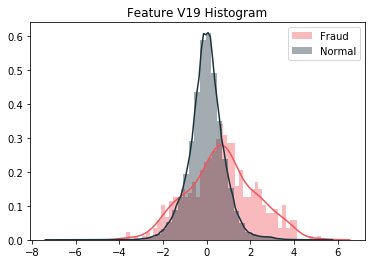

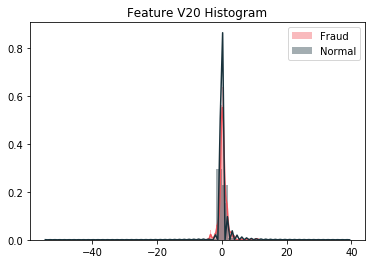

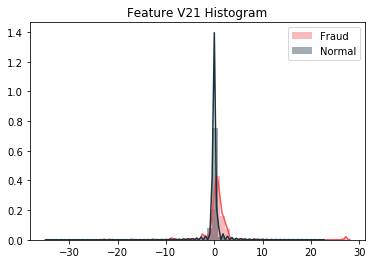

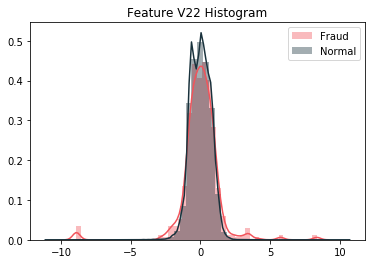

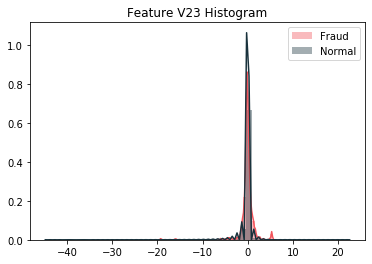

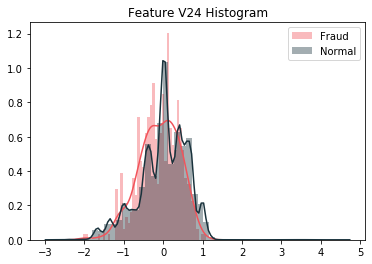

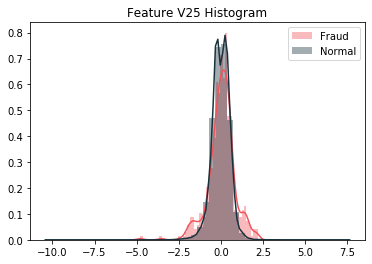

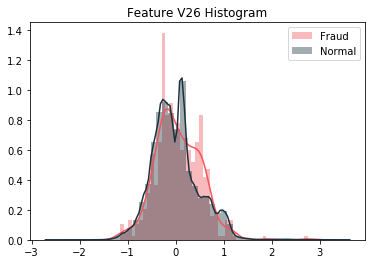

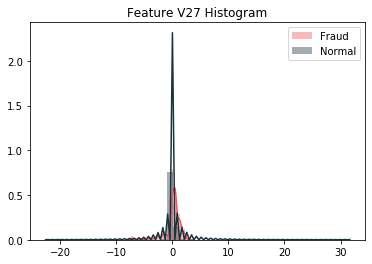

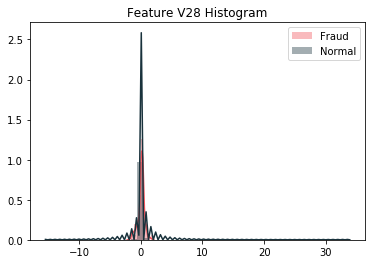

In [9]:
v_1_28 = data.iloc[:, 1:29].columns
plt.figure(figsize = (12, 28))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(data[v_1_28]):
    sns.distplot(data[cn][data.Class == 1], bins = 50, label = 'Fraud', color = '#F2545B')
    sns.distplot(data[cn][data.Class == 0], bins = 50, label = 'Normal', color = '#19323C')
    plt.xlabel('')
    plt.title('Feature '+str(cn)+' Histogram')
    plt.legend(loc = 'upper right')
    plt.show()

### Feature engineering

- Drop 'Time' columns due is not relevant to the analisys
- 'Amount' feature normalization
- Train/test dataset split

In [10]:
from sklearn.preprocessing import StandardScaler

data.drop(['Time'], axis = 1, inplace = True)
data['Amount'] = StandardScaler().fit_transform(data['Amount'].values.reshape(-1,1))


Train/test dataset split

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test = train_test_split(data, test_size = 0.2, random_state = 42)

X_train = X_train[X_train.Class == 0]  #Only keep 'Normal transactions data'
X_train = X_train.drop(['Class'], axis = 1)  #Drop label values
X_train = X_train.values   #Just store the values

Y_test = X_test['Class']
X_test = X_test.drop(['Class'], axis = 1)
X_test = X_test.values

### Autoencoder model definition

Model caracteristics:
- Encoder
    - Input layer with 29 features/values
    - Hidden layer with 20 weights and hyperbolic tangent activation
    - Hidden layer with 14 weights and ReLu activation (bottleneck)
- Decoder
    - Hidden layer with 20 weights and hyperbolic tangent activation
    - Output layer with 29 values
    
Training is going to be only with 'Normal' data. The model only learn how to compress data without anomalies.

Then if a 'Fraud' data is feeded to the algorithm the validation loss is going to be a lot greater than the normal expected for non-Fraud transactions

In [28]:
np.random.seed(5)
from keras.models import Model, load_model
from keras.layers import Input, Dense

input_dim = X_train.shape[1]
input_layer = Input(shape = (input_dim, ))

Topology definition

In [29]:
encoder = Dense(20, activation = 'tanh')(input_layer)  #Input layer
encoder = Dense(14, activation = 'relu')(encoder)  #encoder Hidden layer

decoder = Dense(20, activation = 'tanh')(encoder) #decoder hidden layer
decoder = Dense(29, activation = 'relu')(decoder) #Output layer

autoencoder = Model(inputs = input_layer, outputs = decoder)

#### Model training

- Gradient descent as optimizer
- MSE as loss function

In [14]:
from keras.optimizers import SGD

In [30]:
learning_rate = 0.01
sgd = SGD(lr = learning_rate)
autoencoder.compile(optimizer = 'sgd', loss = 'mse', metrics = ['accuracy','mse'])

Training:

In [31]:
epochs = 100
batch_size = 32
history = autoencoder.fit(X_train, X_train, epochs = epochs, batch_size = batch_size, verbose = 1)

Epoch 1/100
227451/227451 [==============================] - 14s 61us/step - loss: 0.9195 - acc: 0.4319 - mean_squared_error: 0.9195
Epoch 2/100
227451/227451 [==============================] - 13s 58us/step - loss: 0.8119 - acc: 0.6014 - mean_squared_error: 0.8119
Epoch 3/100
227451/227451 [==============================] - 13s 57us/step - loss: 0.7735 - acc: 0.6481 - mean_squared_error: 0.7735
Epoch 4/100
227451/227451 [==============================] - 13s 58us/step - loss: 0.7523 - acc: 0.6683 - mean_squared_error: 0.7523
Epoch 5/100
227451/227451 [==============================] - 13s 56us/step - loss: 0.7363 - acc: 0.6824 - mean_squared_error: 0.7363
Epoch 6/100
227451/227451 [==============================] - 14s 61us/step - loss: 0.7204 - acc: 0.6991 - mean_squared_error: 0.7204
Epoch 7/100
227451/227451 [==============================] - 13s 58us/step - loss: 0.7048 - acc: 0.7221 - mean_squared_error: 0.7048
Epoch 8/100
227451/227451 [==============================] - 13s 56us

Training metrics

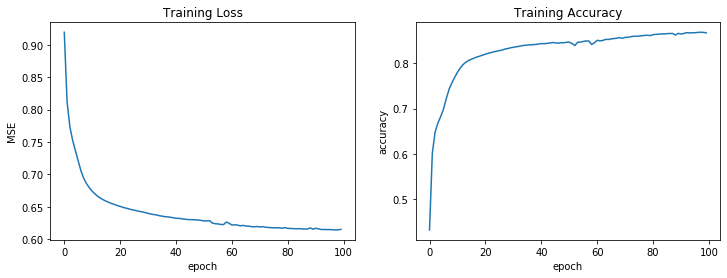

In [51]:
plt.figure(figsize = (12,4))
plt.title('asd')
plt.subplot(1,2,1)
plt.plot(history.history['loss'])
plt.title('Training Loss')
plt.ylabel('MSE')
plt.xlabel('epoch')

plt.subplot(1,2,2)
plt.plot(history.history['acc'])
plt.title('Training Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.show()

### Model performance

Using test data we're going to use the model to predict a possible Fraud and the compare the result using the data labels.

Error is going to be computed using MSE, to determine if input data has some anomalies we need to define a threshold level in wich data below that level is defined as 'Normal' and data over it is 'Fraud'.

First the predictions using test data:

In [52]:
X_pred = autoencoder.predict(X_test)
mse = np.mean(np.power(X_test - X_pred, 2), axis = 1)
print(X_pred.shape)

(56962, 29)


To define a Threshold level Precision and Recall are the metrics used to find a great balance during the prediction phase.

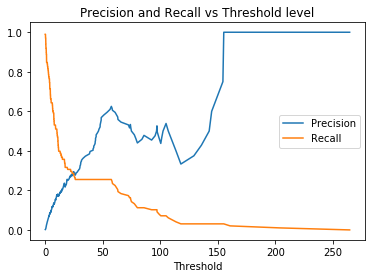

In [80]:
precision, recall, threshold = precision_recall_curve(Y_test, mse)

plt.plot(threshold, precision[1:], label = 'Precision')
plt.plot(threshold, recall[1:], label = 'Recall')
plt.title('Precision and Recall vs Threshold level')
plt.xlabel('Threshold')
plt.ylabel('')
plt.legend(loc = 'center right')
plt.show()

From this graph is easy to see what value is going to be the best for our application. In fraud detection is better to have a good recall (False negative minimization) therefore 0.75 is a good value to optimize Recall during prediction.


In [83]:
threshold_val = 0.75
Y_pred = [1 if e > threshold_val else 0 for e in mse]     #Prediction binarization

In [86]:
y_test = Y_test
y_pred = Y_pred

confusion = confusion_matrix(y_test, y_pred)
print('Confusion Matrix\n')
print(confusion)

#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, y_pred)))
print('\nRecall: {:.2f}\n'.format(recall_score(y_test, y_pred)))


from sklearn.metrics import classification_report
print('\nClassification Report\n')
print(classification_report(y_test, y_pred, target_names=['Normal', 'Fraud']))

Confusion Matrix

[[49612  7252]
 [    8    90]]

Accuracy: 0.87


Recall: 0.92


Classification Report

              precision    recall  f1-score   support

      Normal       1.00      0.87      0.93     56864
       Fraud       0.01      0.92      0.02        98

    accuracy                           0.87     56962
   macro avg       0.51      0.90      0.48     56962
weighted avg       1.00      0.87      0.93     56962

